In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
%matplotlib inline

In [2]:
train_df = pd.read_csv('./train.csv')
test_df = pd.read_csv('./test.csv')

In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [11]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-

In [12]:
X_feature = train_df.drop(['SalePrice'], axis=1)
X_feature.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [13]:
X_feature.loc[:, ['BsmtFullBath', 'BsmtHalfBath', 'MSSubClass']].head()

,BsmtFullBath,BsmtHalfBath,MSSubClass
0,1,0,60
1,0,1,20
2,1,0,60
3,1,0,70
4,1,0,60


In [14]:
Big_df = pd.concat([X_feature, test_df], axis=0)

Big_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal


In [15]:
Big_df[-1455:-1450]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
5,1466,60,RL,75.0,10000,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
6,1467,20,RL,NaN,7980,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,GdPrv,Shed,500,3,2010,WD,Normal
7,1468,60,RL,63.0,8402,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
8,1469,20,RL,85.0,10176,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal


In [16]:
Big_df.index = range(len(Big_df))
Big_df.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
2914,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
2915,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
2916,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
2917,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal
2918,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal


In [17]:
# 정수로 되어 있지만 실제론 범주형 -> object로 변환
int_but_object_data = ['BsmtFullBath', 'BsmtHalfBath', 'MSSubClass']

for col in int_but_object_data:
    Big_df[col] = Big_df[col].astype('object')
    
Big_df[int_but_object_data]

,BsmtFullBath,BsmtHalfBath,MSSubClass
0,1,0,60
1,0,1,20
2,1,0,60
3,1,0,70
4,1,0,60
5,1,0,50
6,1,0,20
7,1,0,60
8,0,0,50
9,1,0,190


In [31]:
Big_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 80 columns):
Id               2919 non-null int64
MSSubClass       2919 non-null int64
MSZoning         2915 non-null object
LotFrontage      2433 non-null float64
LotArea          2919 non-null int64
Street           2919 non-null object
Alley            198 non-null object
LotShape         2919 non-null object
LandContour      2919 non-null object
Utilities        2917 non-null object
LotConfig        2919 non-null object
LandSlope        2919 non-null object
Neighborhood     2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
BldgType         2919 non-null object
HouseStyle       2919 non-null object
OverallQual      2919 non-null int64
OverallCond      2919 non-null int64
YearBuilt        2919 non-null int64
YearRemodAdd     2919 non-null int64
RoofStyle        2919 non-null object
RoofMatl         2919 non-null object
Exterior1st      2918 non-

In [32]:
%xmode Plain

Exception reporting mode: Plain


In [18]:
Big_df.count()

Id               2919
MSSubClass       2919
MSZoning         2915
LotFrontage      2433
LotArea          2919
                 ... 
MiscVal          2919
MoSold           2919
YrSold           2919
SaleType         2918
SaleCondition    2919
Length: 80, dtype: int64

In [19]:
Big_df.isnull().count()

Id               2919
MSSubClass       2919
MSZoning         2919
LotFrontage      2919
LotArea          2919
                 ... 
MiscVal          2919
MoSold           2919
YrSold           2919
SaleType         2919
SaleCondition    2919
Length: 80, dtype: int64

In [20]:
Big_df.isnull().sum()  # NA 수 리턴

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      486
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

In [21]:
missing_value_rank = Big_df.isnull().sum() / Big_df.isnull().count()
missing_value_rank

Id               0.000000
MSSubClass       0.000000
MSZoning         0.001370
LotFrontage      0.166495
LotArea          0.000000
                   ...   
MiscVal          0.000000
MoSold           0.000000
YrSold           0.000000
SaleType         0.000343
SaleCondition    0.000000
Length: 80, dtype: float64

In [22]:
missing_value_rank_df = pd.DataFrame(missing_value_rank, columns=['Missing Value Ratio'])
missing_value_rank_df

,Missing Value Ratio
Id,0.000000
MSSubClass,0.000000
MSZoning,0.001370
LotFrontage,0.166495
LotArea,0.000000
Street,0.000000
Alley,0.932169
LotShape,0.000000
LandContour,0.000000
Utilities,0.000685


In [23]:
missing_value_rank_df[missing_value_rank_df['Missing Value Ratio'] > 0].sort_values('Missing Value Ratio', ascending=False)

,Missing Value Ratio
PoolQC,0.996574
MiscFeature,0.964029
Alley,0.932169
Fence,0.804385
FireplaceQu,0.486468
LotFrontage,0.166495
GarageFinish,0.054471
GarageQual,0.054471
GarageCond,0.054471
GarageYrBlt,0.054471


In [24]:
# 컬럼의 타입을 나눠서 변수에 저장

def seperate_type(df):
    dtypes = df.dtypes
    numerical = [df.columns[idx] for idx, _ in enumerate(dtypes) if dtypes[idx] != object]
    category = [df.columns[idx] for idx, _ in enumerate(dtypes) if dtypes[idx] == object]
    
    return numerical, category

In [25]:
feature = seperate_type(Big_df)
feature

(['Id',
  'LotFrontage',
  'LotArea',
  'OverallQual',
  'OverallCond',
  'YearBuilt',
  'YearRemodAdd',
  'MasVnrArea',
  'BsmtFinSF1',
  'BsmtFinSF2',
  'BsmtUnfSF',
  'TotalBsmtSF',
  '1stFlrSF',
  '2ndFlrSF',
  'LowQualFinSF',
  'GrLivArea',
  'FullBath',
  'HalfBath',
  'BedroomAbvGr',
  'KitchenAbvGr',
  'TotRmsAbvGrd',
  'Fireplaces',
  'GarageYrBlt',
  'GarageCars',
  'GarageArea',
  'WoodDeckSF',
  'OpenPorchSF',
  'EnclosedPorch',
  '3SsnPorch',
  'ScreenPorch',
  'PoolArea',
  'MiscVal',
  'MoSold',
  'YrSold'],
 ['MSSubClass',
  'MSZoning',
  'Street',
  'Alley',
  'LotShape',
  'LandContour',
  'Utilities',
  'LotConfig',
  'LandSlope',
  'Neighborhood',
  'Condition1',
  'Condition2',
  'BldgType',
  'HouseStyle',
  'RoofStyle',
  'RoofMatl',
  'Exterior1st',
  'Exterior2nd',
  'MasVnrType',
  'ExterQual',
  'ExterCond',
  'Foundation',
  'BsmtQual',
  'BsmtCond',
  'BsmtExposure',
  'BsmtFinType1',
  'BsmtFinType2',
  'Heating',
  'HeatingQC',
  'CentralAir',
  'Electric

In [26]:
numerical_feature = feature[0]
category_feature = feature[1]
print(Big_df[numerical_feature].shape, Big_df[category_feature].shape)

(2919, 34) (2919, 46)


In [27]:
corr_data = train_df[numerical_feature].corrwith(train_df['SalePrice']).sort_values(ascending=False)
corr_data

OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
dtype: float64

In [28]:
corr_df = pd.DataFrame(corr_data, columns=['Correlation'])
corr_df

,Correlation
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897
YearRemodAdd,0.507101


Text(0.5, 0, 'Correlation')

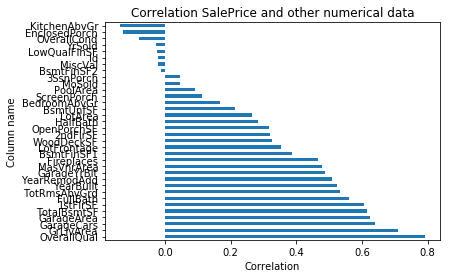

In [29]:
corr_data.plot(kind='barh')
plt.title('Correlation SalePrice and other numerical data')
plt.ylabel('Column name')
plt.xlabel('Correlation')

In [30]:
# 데이터 기울기 정도
skew = train_df.skew().sort_values(ascending=False)
skew

MiscVal          24.476794
PoolArea         14.828374
LotArea          12.207688
3SsnPorch        10.304342
LowQualFinSF      9.011341
KitchenAbvGr      4.488397
BsmtFinSF2        4.255261
ScreenPorch       4.122214
BsmtHalfBath      4.103403
EnclosedPorch     3.089872
MasVnrArea        2.669084
OpenPorchSF       2.364342
LotFrontage       2.163569
SalePrice         1.882876
BsmtFinSF1        1.685503
WoodDeckSF        1.541376
TotalBsmtSF       1.524255
MSSubClass        1.407657
1stFlrSF          1.376757
GrLivArea         1.366560
BsmtUnfSF         0.920268
2ndFlrSF          0.813030
OverallCond       0.693067
TotRmsAbvGrd      0.676341
HalfBath          0.675897
Fireplaces        0.649565
BsmtFullBath      0.596067
OverallQual       0.216944
MoSold            0.212053
BedroomAbvGr      0.211790
GarageArea        0.179981
YrSold            0.096269
FullBath          0.036562
Id                0.000000
GarageCars       -0.342549
YearRemodAdd     -0.503562
YearBuilt        -0.613461
G

In [ ]:
# skew 20 이상인 것들은 정규분포 따르게 정규화 해줄 것. (log)

## 결측치 처리

In [31]:
Big_df_numeric = Big_df.loc[:, numerical_feature]
Big_df_numeric

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,548.0,0,61,0,0,0,0,0,2,2008
1,2,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,460.0,298,0,0,0,0,0,0,5,2007
2,3,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,608.0,0,42,0,0,0,0,0,9,2008
3,4,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,642.0,0,35,272,0,0,0,0,2,2006
4,5,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,836.0,192,84,0,0,0,0,0,12,2008
5,6,85.0,14115,5,5,1993,1995,0.0,732.0,0.0,...,480.0,40,30,0,320,0,0,700,10,2009
6,7,75.0,10084,8,5,2004,2005,186.0,1369.0,0.0,...,636.0,255,57,0,0,0,0,0,8,2007
7,8,NaN,10382,7,6,1973,1973,240.0,859.0,32.0,...,484.0,235,204,228,0,0,0,350,11,2009
8,9,51.0,6120,7,5,1931,1950,0.0,0.0,0.0,...,468.0,90,0,205,0,0,0,0,4,2008
9,10,50.0,7420,5,6,1939,1950,0.0,851.0,0.0,...,205.0,0,4,0,0,0,0,0,1,2008


In [32]:
Big_df_numeric.drop('Id', axis=1, inplace=True)

In [33]:
Big_df_numeric.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,...,548.0,0,61,0,0,0,0,0,2,2008
1,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,...,460.0,298,0,0,0,0,0,0,5,2007
2,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,...,608.0,0,42,0,0,0,0,0,9,2008
3,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,...,642.0,0,35,272,0,0,0,0,2,2006
4,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,...,836.0,192,84,0,0,0,0,0,12,2008


In [34]:
Big_df_numeric.median()

LotFrontage        68.0
LotArea          9453.0
OverallQual         6.0
OverallCond         5.0
YearBuilt        1973.0
YearRemodAdd     1993.0
MasVnrArea          0.0
BsmtFinSF1        368.5
BsmtFinSF2          0.0
BsmtUnfSF         467.0
TotalBsmtSF       989.5
1stFlrSF         1082.0
2ndFlrSF            0.0
LowQualFinSF        0.0
GrLivArea        1444.0
FullBath            2.0
HalfBath            0.0
BedroomAbvGr        3.0
KitchenAbvGr        1.0
TotRmsAbvGrd        6.0
Fireplaces          1.0
GarageYrBlt      1979.0
GarageCars          2.0
GarageArea        480.0
WoodDeckSF          0.0
OpenPorchSF        26.0
EnclosedPorch       0.0
3SsnPorch           0.0
ScreenPorch         0.0
PoolArea            0.0
MiscVal             0.0
MoSold              6.0
YrSold           2008.0
dtype: float64

In [35]:
Big_df_numeric.fillna(Big_df_numeric.median(), inplace=True)

In [36]:
Big_df_category = Big_df.loc[:, category_feature]
Big_df_category.head()

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,60,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,20,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,60,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,70,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,60,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [78]:
Big_df_category.Street.value_counts()

Pave    2907
Grvl      12
Name: Street, dtype: int64

In [39]:
fill_label = ['FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
              'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
              'PoolQC', 'MiscFeature', 'Alley', 'Fence']

In [40]:
for column in fill_label:
    Big_df_category.loc[:,column].fillna('NE', inplace=True)

In [42]:
Big_df_category.head(10)

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,60,RL,Pave,NE,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,Attchd,RFn,TA,TA,Y,NE,NE,NE,WD,Normal
1,20,RL,Pave,NE,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,Attchd,RFn,TA,TA,Y,NE,NE,NE,WD,Normal
2,60,RL,Pave,NE,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,Attchd,RFn,TA,TA,Y,NE,NE,NE,WD,Normal
3,70,RL,Pave,NE,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,Detchd,Unf,TA,TA,Y,NE,NE,NE,WD,Abnorml
4,60,RL,Pave,NE,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,Attchd,RFn,TA,TA,Y,NE,NE,NE,WD,Normal
5,50,RL,Pave,NE,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,...,Attchd,Unf,TA,TA,Y,NE,MnPrv,Shed,WD,Normal
6,20,RL,Pave,NE,Reg,Lvl,AllPub,Inside,Gtl,Somerst,...,Attchd,RFn,TA,TA,Y,NE,NE,NE,WD,Normal
7,60,RL,Pave,NE,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,...,Attchd,RFn,TA,TA,Y,NE,NE,Shed,WD,Normal
8,50,RM,Pave,NE,Reg,Lvl,AllPub,Inside,Gtl,OldTown,...,Detchd,Unf,Fa,TA,Y,NE,NE,NE,WD,Abnorml
9,190,RL,Pave,NE,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,...,Attchd,RFn,Gd,TA,Y,NE,NE,NE,WD,Normal


In [43]:
Big_df_category.mode() # 범주형 데이터의 최빈값 조회

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,20,RL,Pave,NE,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,Attchd,Unf,TA,TA,Y,NE,NE,NE,WD,Normal


In [44]:
Big_df_category.mode().iloc[0]

MSSubClass            20
MSZoning              RL
Street              Pave
Alley                 NE
LotShape             Reg
LandContour          Lvl
Utilities         AllPub
LotConfig         Inside
LandSlope            Gtl
Neighborhood       NAmes
Condition1          Norm
Condition2          Norm
BldgType            1Fam
HouseStyle        1Story
RoofStyle          Gable
RoofMatl         CompShg
Exterior1st      VinylSd
Exterior2nd      VinylSd
MasVnrType          None
ExterQual             TA
ExterCond             TA
Foundation         PConc
BsmtQual              TA
BsmtCond              TA
BsmtExposure          No
BsmtFinType1         Unf
BsmtFinType2         Unf
Heating             GasA
HeatingQC             Ex
CentralAir             Y
Electrical         SBrkr
BsmtFullBath           0
BsmtHalfBath           0
KitchenQual           TA
Functional           Typ
FireplaceQu           NE
GarageType        Attchd
GarageFinish         Unf
GarageQual            TA
GarageCond            TA


In [46]:
Big_df_category.isna().sum()

MSSubClass        0
MSZoning          4
Street            0
Alley             0
LotShape          0
LandContour       0
Utilities         2
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
RoofStyle         0
RoofMatl          0
Exterior1st       1
Exterior2nd       1
MasVnrType       24
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual          0
BsmtCond          0
BsmtExposure      0
BsmtFinType1      0
BsmtFinType2      0
Heating           0
HeatingQC         0
CentralAir        0
Electrical        1
BsmtFullBath      2
BsmtHalfBath      2
KitchenQual       1
Functional        2
FireplaceQu       0
GarageType        0
GarageFinish      0
GarageQual        0
GarageCond        0
PavedDrive        0
PoolQC            0
Fence             0
MiscFeature       0
SaleType          1
SaleCondition     0
dtype: int64

In [47]:
Big_df_category.fillna(Big_df_category.mode().iloc[0], inplace=True)

In [48]:
Big_df_category.isna().sum()

MSSubClass       0
MSZoning         0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
BsmtFullBath     0
BsmtHalfBath     0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
PoolQC           0
Fence            0
MiscFeature      0
SaleType         0
SaleCondition    0
dtype: int64

## 새로운 컬럼 추가

In [49]:
# First, Second Floor square feet
Big_df_numeric[['1stFlrSF', '2ndFlrSF']].head()

,1stFlrSF,2ndFlrSF
0,856,854
1,1262,0
2,920,866
3,961,756
4,1145,1053


In [50]:
Big_df_numeric[['OpenPorchSF', 'EnclosedPorch','3SsnPorch', 'ScreenPorch']].head()

,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch
0,61,0,0,0
1,0,0,0,0
2,42,0,0,0
3,35,272,0,0
4,84,0,0,0


In [51]:
Big_df_numeric[['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF']].head()

,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF
0,706.0,0.0,150.0,856.0
1,978.0,0.0,284.0,1262.0
2,486.0,0.0,434.0,920.0
3,216.0,0.0,540.0,756.0
4,655.0,0.0,490.0,1145.0


In [52]:
Big_df_numeric['TotalFlrSF'] = Big_df_numeric['1stFlrSF'] + Big_df_numeric['2ndFlrSF']
Big_df_numeric['TotalPorchSF'] = Big_df_numeric['OpenPorchSF'] + Big_df_numeric['EnclosedPorch'] + Big_df_numeric['3SsnPorch'] + Big_df_numeric['ScreenPorch']

Big_df_numeric.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,TotalFlrSF,TotalPorchSF
0,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,...,61,0,0,0,0,0,2,2008,1710,61
1,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,...,0,0,0,0,0,0,5,2007,1262,0
2,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,...,42,0,0,0,0,0,9,2008,1786,42
3,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,...,35,272,0,0,0,0,2,2006,1717,307
4,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,...,84,0,0,0,0,0,12,2008,2198,84


## 컬럼 선택

In [53]:
analysis_numeric = Big_df_numeric[0:train_df.shape[0]]
analysis_numeric.shape

(1460, 35)

In [54]:
analysis_numeric_corr = pd.DataFrame(analysis_numeric.corrwith(train_df['SalePrice']).
                                    sort_values(ascending=False), columns=['Correlation'])
analysis_numeric_corr

,Correlation
OverallQual,0.790982
TotalFlrSF,0.716883
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897


In [55]:
# 상관관계 0.25 이상인 컬럼만 리턴
corr_numeric_columns = analysis_numeric_corr.loc[analysis_numeric_corr['Correlation']>0.25]
corr_numeric_columns

,Correlation
OverallQual,0.790982
TotalFlrSF,0.716883
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897


In [56]:
corr_numeric_columns.index.tolist() # 0.25 이상 컬럼명 조회

['OverallQual',
 'TotalFlrSF',
 'GrLivArea',
 'GarageCars',
 'GarageArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'FullBath',
 'TotRmsAbvGrd',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'GarageYrBlt',
 'Fireplaces',
 'BsmtFinSF1',
 'LotFrontage',
 'WoodDeckSF',
 '2ndFlrSF',
 'OpenPorchSF',
 'HalfBath',
 'LotArea']

In [57]:
Big_df_numeric_corr = Big_df_numeric[corr_numeric_columns.index.tolist()]
Big_df_numeric_corr  # 상관관계 0.25 이상인 컬럼만 리턴

,OverallQual,TotalFlrSF,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,...,MasVnrArea,GarageYrBlt,Fireplaces,BsmtFinSF1,LotFrontage,WoodDeckSF,2ndFlrSF,OpenPorchSF,HalfBath,LotArea
0,7,1710,1710,2.0,548.0,856.0,856,2,8,2003,...,196.0,2003.0,0,706.0,65.0,0,854,61,1,8450
1,6,1262,1262,2.0,460.0,1262.0,1262,2,6,1976,...,0.0,1976.0,1,978.0,80.0,298,0,0,0,9600
2,7,1786,1786,2.0,608.0,920.0,920,2,6,2001,...,162.0,2001.0,1,486.0,68.0,0,866,42,1,11250
3,7,1717,1717,3.0,642.0,756.0,961,1,7,1915,...,0.0,1998.0,1,216.0,60.0,0,756,35,0,9550
4,8,2198,2198,3.0,836.0,1145.0,1145,2,9,2000,...,350.0,2000.0,1,655.0,84.0,192,1053,84,1,14260
5,5,1362,1362,2.0,480.0,796.0,796,1,5,1993,...,0.0,1993.0,0,732.0,85.0,40,566,30,1,14115
6,8,1694,1694,2.0,636.0,1686.0,1694,2,7,2004,...,186.0,2004.0,1,1369.0,75.0,255,0,57,0,10084
7,7,2090,2090,2.0,484.0,1107.0,1107,2,7,1973,...,240.0,1973.0,2,859.0,68.0,235,983,204,1,10382
8,7,1774,1774,2.0,468.0,952.0,1022,2,8,1931,...,0.0,1931.0,2,0.0,51.0,90,752,0,0,6120
9,5,1077,1077,1.0,205.0,991.0,1077,1,5,1939,...,0.0,1939.0,2,851.0,50.0,0,0,4,0,7420


In [58]:
analysis_category = Big_df_category[0:train_df.shape[0]]
analysis_category

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,60,RL,Pave,NE,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,Attchd,RFn,TA,TA,Y,NE,NE,NE,WD,Normal
1,20,RL,Pave,NE,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,Attchd,RFn,TA,TA,Y,NE,NE,NE,WD,Normal
2,60,RL,Pave,NE,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,Attchd,RFn,TA,TA,Y,NE,NE,NE,WD,Normal
3,70,RL,Pave,NE,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,Detchd,Unf,TA,TA,Y,NE,NE,NE,WD,Abnorml
4,60,RL,Pave,NE,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,Attchd,RFn,TA,TA,Y,NE,NE,NE,WD,Normal
5,50,RL,Pave,NE,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,...,Attchd,Unf,TA,TA,Y,NE,MnPrv,Shed,WD,Normal
6,20,RL,Pave,NE,Reg,Lvl,AllPub,Inside,Gtl,Somerst,...,Attchd,RFn,TA,TA,Y,NE,NE,NE,WD,Normal
7,60,RL,Pave,NE,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,...,Attchd,RFn,TA,TA,Y,NE,NE,Shed,WD,Normal
8,50,RM,Pave,NE,Reg,Lvl,AllPub,Inside,Gtl,OldTown,...,Detchd,Unf,Fa,TA,Y,NE,NE,NE,WD,Abnorml
9,190,RL,Pave,NE,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,...,Attchd,RFn,Gd,TA,Y,NE,NE,NE,WD,Normal


In [59]:
# One hot encoding
pd.get_dummies(analysis_category).head(100)

,MSSubClass,BsmtFullBath,BsmtHalfBath,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,1.0,0.0,0,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,1,0
1,20,0.0,1.0,0,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,1,0
2,60,1.0,0.0,0,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,1,0
3,70,1.0,0.0,0,0,0,1,0,0,1,...,0,0,0,1,1,0,0,0,0,0
4,60,1.0,0.0,0,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,1,0
5,50,1.0,0.0,0,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,1,0
6,20,1.0,0.0,0,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,1,0
7,60,1.0,0.0,0,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,1,0
8,50,0.0,0.0,0,0,0,0,1,0,1,...,0,0,0,1,1,0,0,0,0,0
9,190,1.0,0.0,0,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,1,0


In [60]:
analysis_category = pd.DataFrame(pd.get_dummies(analysis_category).
                                corrwith(train_df['SalePrice']).
                                sort_values(ascending=False), columns=['Correlation'])
analysis_category

,Correlation
BsmtQual_Ex,0.553105
KitchenQual_Ex,0.504094
Foundation_PConc,0.497734
ExterQual_Gd,0.452466
ExterQual_Ex,0.451164
BsmtFinType1_GLQ,0.434597
HeatingQC_Ex,0.434543
GarageFinish_Fin,0.419678
Neighborhood_NridgHt,0.402149
SaleType_New,0.357509


In [61]:
corr_cate_columns = analysis_category.loc[analysis_category['Correlation']>0.25]
corr_cate_columns

,Correlation
BsmtQual_Ex,0.553105
KitchenQual_Ex,0.504094
Foundation_PConc,0.497734
ExterQual_Gd,0.452466
ExterQual_Ex,0.451164
BsmtFinType1_GLQ,0.434597
HeatingQC_Ex,0.434543
GarageFinish_Fin,0.419678
Neighborhood_NridgHt,0.402149
SaleType_New,0.357509


In [62]:
corr_cate_columns.index.tolist()

['BsmtQual_Ex',
 'KitchenQual_Ex',
 'Foundation_PConc',
 'ExterQual_Gd',
 'ExterQual_Ex',
 'BsmtFinType1_GLQ',
 'HeatingQC_Ex',
 'GarageFinish_Fin',
 'Neighborhood_NridgHt',
 'SaleType_New',
 'SaleCondition_Partial',
 'FireplaceQu_Gd',
 'GarageType_Attchd',
 'MasVnrType_Stone',
 'Neighborhood_NoRidge',
 'KitchenQual_Gd',
 'BsmtExposure_Gd',
 'Exterior2nd_VinylSd',
 'Exterior1st_VinylSd',
 'GarageCond_TA',
 'FireplaceQu_Ex',
 'CentralAir_Y']

In [63]:
Big_df_category_onehot = pd.get_dummies(Big_df_category)
Big_df_category_onehot.head()

,MSSubClass,BsmtFullBath,BsmtHalfBath,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,1.0,0.0,0,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,1,0
1,20,0.0,1.0,0,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,1,0
2,60,1.0,0.0,0,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,1,0
3,70,1.0,0.0,0,0,0,1,0,0,1,...,0,0,0,1,1,0,0,0,0,0
4,60,1.0,0.0,0,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,1,0


In [64]:
Big_df_category_onehot_corr = Big_df_category_onehot[corr_cate_columns.index.tolist()]
Big_df_category_onehot_corr.head()

,BsmtQual_Ex,KitchenQual_Ex,Foundation_PConc,ExterQual_Gd,ExterQual_Ex,BsmtFinType1_GLQ,HeatingQC_Ex,GarageFinish_Fin,Neighborhood_NridgHt,SaleType_New,...,GarageType_Attchd,MasVnrType_Stone,Neighborhood_NoRidge,KitchenQual_Gd,BsmtExposure_Gd,Exterior2nd_VinylSd,Exterior1st_VinylSd,GarageCond_TA,FireplaceQu_Ex,CentralAir_Y
0,0,0,1,1,0,1,1,0,0,0,...,1,0,0,1,0,1,1,1,0,1
1,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,1,0,1
2,0,0,1,1,0,1,1,0,0,0,...,1,0,0,1,0,1,1,1,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1
4,0,0,1,1,0,1,1,0,0,0,...,1,0,1,1,0,1,1,1,0,1


## 이상치 제거

In [65]:
TotalBigX = pd.concat([Big_df_numeric_corr, Big_df_category_onehot_corr], axis = 1)
TotalBigX.shape

(2919, 43)

In [66]:
len(train_df)

1460

In [67]:
train_X = TotalBigX[0:len(train_df)]
test_X = TotalBigX[len(train_df):]

In [70]:
train_X = pd.concat([train_X, train_df['SalePrice']], axis=1)

In [71]:
print('The number of the train data:', train_X.shape, '\n',
      'The number of the test data:', test_X.shape)

The number of the train data: (1460, 44) 
 The number of the test data: (1459, 43)


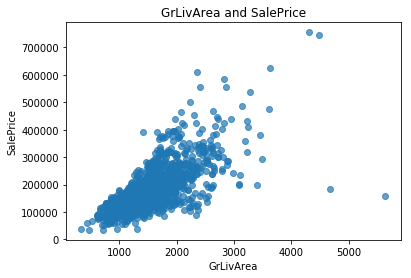

In [72]:
plt.scatter(train_X['GrLivArea'], train_X['SalePrice'], alpha=0.7)
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.title(u'GrLivArea and SalePrice')
plt.show()

In [73]:
train_X = train_X[train_X['GrLivArea'] <= 4500]

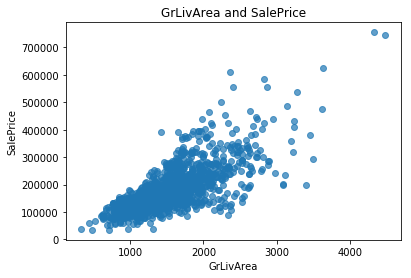

In [74]:
plt.scatter(train_X['GrLivArea'], train_X['SalePrice'], alpha=0.7)
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.title(u'GrLivArea and SalePrice')
plt.show()

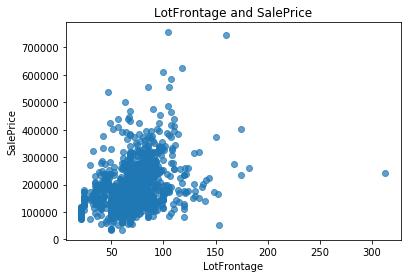

In [75]:
plt.scatter(train_X['LotFrontage'], train_X['SalePrice'], alpha=0.7)
plt.xlabel('LotFrontage')
plt.ylabel('SalePrice')
plt.title('LotFrontage and SalePrice')
plt.show()

In [76]:
train_X = train_X[train_X['LotFrontage'] <= 300]

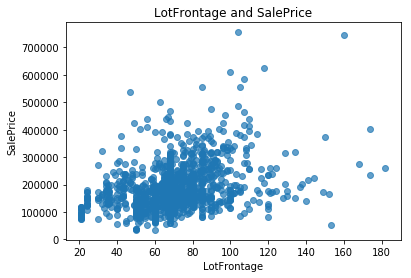

In [77]:
plt.scatter(train_X['LotFrontage'], train_X['SalePrice'], alpha=0.7)
plt.xlabel('LotFrontage')
plt.ylabel('SalePrice')
plt.title('LotFrontage and SalePrice')
plt.show()

## 서로 상관 관계 높은 컬럼 삭제

In [83]:
feature_corr = pd.DataFrame(train_X.corr())
feature_corr[feature_corr > 0.8]

,OverallQual,TotalFlrSF,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,...,MasVnrType_Stone,Neighborhood_NoRidge,KitchenQual_Gd,BsmtExposure_Gd,Exterior2nd_VinylSd,Exterior1st_VinylSd,GarageCond_TA,FireplaceQu_Ex,CentralAir_Y,SalePrice
OverallQual,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TotalFlrSF,NaN,1.000000,0.995406,NaN,NaN,NaN,NaN,NaN,0.823994,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GrLivArea,NaN,0.995406,1.000000,NaN,NaN,NaN,NaN,NaN,0.829355,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GarageCars,NaN,NaN,NaN,1.000000,0.887308,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GarageArea,NaN,NaN,NaN,0.887308,1.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TotalBsmtSF,NaN,NaN,NaN,NaN,NaN,1.000000,0.807736,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1stFlrSF,NaN,NaN,NaN,NaN,NaN,0.807736,1.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FullBath,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TotRmsAbvGrd,NaN,0.823994,0.829355,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YearBuilt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [80]:
feature_corr['TotalFlrSF'].sort_values(ascending=False)

TotalFlrSF               1.000000
GrLivArea                0.995406
TotRmsAbvGrd             0.823994
SalePrice                0.743943
2ndFlrSF                 0.695819
FullBath                 0.643974
OverallQual              0.597473
1stFlrSF                 0.539274
GarageCars               0.488835
GarageArea               0.467089
Fireplaces               0.462932
HalfBath                 0.426042
TotalBsmtSF              0.416966
MasVnrArea               0.378957
Neighborhood_NoRidge     0.339771
LotFrontage              0.327407
ExterQual_Gd             0.326877
OpenPorchSF              0.304158
Foundation_PConc         0.301022
BsmtQual_Ex              0.294902
YearRemodAdd             0.294778
GarageFinish_Fin         0.285268
KitchenQual_Ex           0.284070
HeatingQC_Ex             0.258976
FireplaceQu_Gd           0.257732
WoodDeckSF               0.252528
KitchenQual_Gd           0.250523
ExterQual_Ex             0.241291
LotArea                  0.233491
GarageYrBlt   

In [81]:
feature_corr['GarageArea'].sort_values(ascending=False)

GarageArea               1.000000
GarageCars               0.887308
SalePrice                0.629268
OverallQual              0.557247
GarageCond_TA            0.487987
YearBuilt                0.478064
1stFlrSF                 0.478026
TotalBsmtSF              0.475400
GarageYrBlt              0.473112
TotalFlrSF               0.467089
GrLivArea                0.456434
FullBath                 0.404082
Foundation_PConc         0.387629
ExterQual_Gd             0.376902
YearRemodAdd             0.370035
BsmtQual_Ex              0.361416
MasVnrArea               0.360890
TotRmsAbvGrd             0.328821
LotFrontage              0.315839
BsmtFinType1_GLQ         0.307020
Neighborhood_NridgHt     0.304649
HeatingQC_Ex             0.301463
KitchenQual_Gd           0.297732
GarageType_Attchd        0.294873
SaleType_New             0.286745
Exterior2nd_VinylSd      0.285955
KitchenQual_Ex           0.285102
SaleCondition_Partial    0.284894
Exterior1st_VinylSd      0.284408
MasVnrType_Sto

In [87]:
train_Y = train_X['SalePrice']

KeyError: 'SalePrice'

In [ ]:
train_X.drop(['SalePrice'], axis=1, inplace=True)

In [88]:
train_X.drop(['GarageCars'], axis=1, inplace=True)
train_X.drop(['TotalFlrSF'], axis=1, inplace=True)

In [90]:
train_X.shape

(1457, 41)

In [92]:
train_Y.shape

(1457,)

## 데이터 스케일

In [93]:
std_scaler = StandardScaler() # 전체 데이터 범위를 (데이터-평균)/표준편차

train_X_std_scaler = std_scaler.fit_transform(train_X)

In [94]:
train_X_std_scaler_df = pd.DataFrame(train_X_std_scaler,
                                     columns=train_X.columns,
                                     index=train_X.index)
train_X_std_scaler_df

,OverallQual,GrLivArea,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,MasVnrArea,...,GarageType_Attchd,MasVnrType_Stone,Neighborhood_NoRidge,KitchenQual_Gd,BsmtExposure_Gd,Exterior2nd_VinylSd,Exterior1st_VinylSd,GarageCond_TA,FireplaceQu_Ex,CentralAir_Y
0,0.658830,0.393796,0.357960,-0.474584,-0.814025,0.793990,0.923306,1.052393,0.881146,0.523424,...,0.823754,-0.307678,-0.170161,1.220901,-0.314314,1.375090,1.352452,0.318253,-0.129414,0.264103
1,-0.067828,-0.488671,-0.056670,0.504198,0.279506,0.793990,-0.315420,0.158126,-0.427401,-0.570999,...,0.823754,-0.307678,-0.170161,-0.819067,3.181531,-0.727225,-0.739398,0.318253,-0.129414,0.264103
2,0.658830,0.543501,0.640662,-0.320293,-0.641646,0.793990,-0.315420,0.986151,0.832681,0.333575,...,0.823754,-0.307678,-0.170161,1.220901,-0.314314,1.375090,1.352452,0.318253,-0.129414,0.264103
3,0.658830,0.407585,0.800860,-0.715663,-0.531215,-1.024946,0.303943,-1.862255,-0.718189,-0.570999,...,-1.213954,-0.307678,-0.170161,1.220901,-0.314314,-0.727225,-0.739398,0.318253,-0.129414,0.264103
4,1.385487,1.355055,1.714930,0.222135,-0.035625,0.793990,1.542668,0.953030,0.735752,1.383327,...,0.823754,-0.307678,5.876784,1.220901,-0.314314,1.375090,1.352452,0.318253,-0.129414,0.264103
5,-0.794486,-0.291692,0.037564,-0.619231,-0.975631,-1.024946,-0.934783,0.721183,0.493428,-0.570999,...,0.823754,-0.307678,-0.170161,-0.819067,-0.314314,1.375090,1.352452,0.318253,-0.129414,0.264103
6,1.385487,0.362280,0.772590,1.526374,1.443067,0.793990,0.303943,1.085514,0.978075,0.467586,...,0.823754,3.250153,-0.170161,1.220901,-0.314314,1.375090,1.352452,0.318253,-0.129414,0.264103
7,0.658830,1.142318,0.056411,0.130525,-0.137975,0.793990,0.303943,0.058763,-0.572795,0.769110,...,0.823754,3.250153,-0.170161,-0.819067,-0.314314,-0.727225,-0.739398,0.318253,-0.129414,0.264103
8,0.658830,0.519863,-0.018976,-0.243148,-0.366916,0.793990,0.923306,-1.332319,-1.687482,-0.570999,...,-1.213954,-0.307678,-0.170161,-0.819067,-0.314314,-0.727225,-0.739398,0.318253,-0.129414,0.264103
9,-0.794486,-0.853083,-1.258154,-0.149127,-0.218778,-1.024946,-0.934783,-1.067351,-1.687482,-0.570999,...,0.823754,-0.307678,-0.170161,-0.819067,-0.314314,-0.727225,-0.739398,0.318253,-0.129414,0.264103


## 선형회귀

In [95]:
X_train, X_test, y_train, y_test = train_test_split(train_X, train_Y, test_size=0.2,
                                                    random_state=42)

In [96]:
LR = LinearRegression()
LR.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [97]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

y_true = y_test
y_pred = LR.predict(X_test)

RMSE = np.log1p(mean_squared_error(y_true, y_pred)**0.5)
MSE  = np.log1p(mean_squared_error(y_true, y_pred))
MAE  = np.log1p(mean_absolute_error(y_true, y_pred))

R2 = r2_score(y_true, y_pred)
print('MAE', MAE, '\nMSE', MSE, '\nRMSE', RMSE, '\nR2', R2)

MAE 9.841714596331764 
MSE 20.404678689963053 
RMSE 10.2023764270725 
R2 0.8880523017168764


In [98]:
from sklearn.feature_selection import f_regression, SelectKBest, mutual_info_regression

select = SelectKBest(f_regression, k=20)

# SelectBest(f_regression, k=20): 가장 오차 적은 (의미 있는) feature 20개 자동 선택 (후 회귀 계산ㄱ)
# f_regression: 경우의 수 다 돌려보고 가장 오차 적은 W, b 자동 선택

In [99]:
X_new01 = select.fit_transform(X_train, y_train)
X_new_test01 = select.transform(X_test)

In [100]:
X_new01

array([[5.000e+00, 1.314e+03, 2.940e+02, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [7.000e+00, 1.674e+03, 6.630e+02, ..., 1.000e+00, 1.000e+00,
        0.000e+00],
       [5.000e+00, 1.387e+03, 2.560e+02, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       ...,
       [5.000e+00, 1.128e+03, 5.250e+02, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [5.000e+00, 1.039e+03, 5.040e+02, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [7.000e+00, 1.959e+03, 4.340e+02, ..., 0.000e+00, 1.000e+00,
        0.000e+00]])

In [101]:
X_new_test01

array([[7.000e+00, 1.820e+03, 2.400e+02, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [6.000e+00, 1.337e+03, 5.110e+02, ..., 1.000e+00, 1.000e+00,
        0.000e+00],
       [5.000e+00, 1.056e+03, 5.720e+02, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       ...,
       [6.000e+00, 1.494e+03, 2.130e+02, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [7.000e+00, 1.665e+03, 5.620e+02, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [6.000e+00, 8.480e+02, 4.200e+02, ..., 1.000e+00, 1.000e+00,
        0.000e+00]])

In [102]:
X_new_test01.shape

(292, 20)

In [103]:
X_train.columns[select.get_support().tolist()] # 자동 선택된 최적 컬럼들 리턴

Index(['OverallQual', 'GrLivArea', 'GarageArea', 'TotalBsmtSF', '1stFlrSF',
       'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'GarageYrBlt', 'Fireplaces', 'BsmtQual_Ex', 'KitchenQual_Ex',
       'Foundation_PConc', 'ExterQual_Gd', 'ExterQual_Ex', 'BsmtFinType1_GLQ',
       'HeatingQC_Ex', 'Neighborhood_NridgHt'],
      dtype='object')

In [104]:
LR.fit(X_new01, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [105]:
y_true = y_test
y_pred = LR.predict(X_new_test01)

RMSE = np.log1p(mean_squared_error(y_true, y_pred)**0.5)
MSE  = np.log1p(mean_squared_error(y_true, y_pred))
MAE  = np.log1p(mean_absolute_error(y_true, y_pred))

R2 = r2_score(y_true, y_pred)
print('MAE', MAE, '\nMSE', MSE, '\nRMSE', RMSE, '\nR2', R2)

MAE 9.932525908547456 
MSE 20.47819133475658 
RMSE 10.239131411261157 
R2 0.8795126910457807


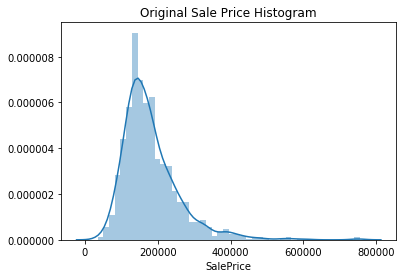

In [106]:
plt.title('Original Sale Price Histogram')
sns.distplot(y_train)

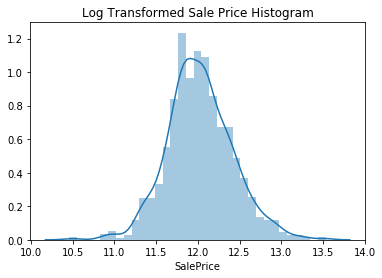

In [107]:
plt.title('Log Transformed Sale Price Histogram')
y_train_log = np.log1p(y_train)
sns.distplot(y_train_log)

In [108]:
LR.fit(X_train, y_train_log)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [110]:
y_true = np.log1p(y_test)
y_pred = LR.predict(X_test)

RMSE = (mean_squared_error(y_true, y_pred)**0.5)
MSE  = (mean_squared_error(y_true, y_pred))
MAE  = (mean_absolute_error(y_true, y_pred))

R2 = r2_score(y_true, y_pred)
print('MAE', MAE, '\nMSE', MSE, '\nRMSE', RMSE, '\nR2', R2)

MAE 0.10183310923691546 
MSE 0.02203845801105883 
RMSE 0.14845355506372634 
R2 0.8789493633864036


In [114]:
from sklearn.neural_network import MLPRegressor

regr = MLPRegressor(hidden_layer_sizes=(250, 700, 1000, 600),
                    activation='relu', solver='adam', batch_size='auto',
                    learning_rate_init=0.001, max_iter=50000)

regr.fit(X_train, y_train_log)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(250, 700, 1000, 600), learning_rate='constant',
             learning_rate_init=0.001, max_iter=50000, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [115]:
y_true = np.log1p(y_test)
y_pred = regr.predict(X_test)

RMSE = np.log1p(mean_squared_error(y_true, y_pred)**0.5)
MSE  = np.log1p(mean_squared_error(y_true, y_pred))
MAE  = np.log1p(mean_absolute_error(y_true, y_pred))

R2 = r2_score(y_true, y_pred)
print('MAE', MAE, '\nMSE', MSE, '\nRMSE', RMSE, '\nR2', R2)

MAE 1.0657838219963642 
MSE 1.7822878795439108 
RMSE 1.1704319023487497 
R2 -26.152825624748342
